In [4]:
path = "C:/Users/inesm/OneDrive/Documentos/tfg/ModeloFriedkin/resultados_2025-12-01_213229/resultados.csv"

In [5]:
import pandas as pd
df = pd.read_csv(path)

In [6]:
df.describe()

,replica,fracTrolls,lambda,rangoFinal,stdFinal,medianFinal,meanFinal,propNeg,medianNorm,NDI,P2,P4,resid,tconv
count,84150.000000,84150.000000,84150.00000,84150.000000,84150.000000,84150.000000,84150.000000,84150.000000,84150.000000,84150.000000,84150.000000,84150.000000,8.415000e+04,84150.000000
mean,25.500000,0.150000,0.50000,1.532241,0.439992,0.272395,0.123549,0.162310,0.313322,114.259490,0.323694,146.605500,6.184198e-07,20.318515
std,14.430955,0.094869,0.24495,0.430991,0.158381,0.276032,0.300804,0.301316,0.264737,71.518037,0.091452,32.276067,2.507791e-07,16.453245
min,1.000000,0.000000,0.10000,0.103874,0.025131,-0.782169,-0.795964,0.000000,-0.709136,0.318188,0.045517,30.151286,2.264313e-08,4.000000
25%,13.000000,0.060000,0.30000,1.366638,0.331047,0.150841,-0.054799,0.000000,0.212942,55.263321,0.270214,126.320844,4.242561e-07,9.000000
50%,25.500000,0.150000,0.50000,1.694296,0.457234,0.371724,0.150683,0.013746,0.424680,106.454464,0.327504,156.431210,6.476529e-07,15.000000
75%,38.000000,0.240000,0.70000,1.848713,0.564818,0.477279,0.358948,0.128571,0.502104,166.179478,0.380456,167.750533,8.377745e-07,25.000000
max,50.000000,0.300000,0.90000,1.988899,0.741540,0.577740,0.577368,1.000000,0.577740,323.765059,0.658878,238.789115,9.999988e-07,116.000000


<Figure size 1200x600 with 0 Axes>

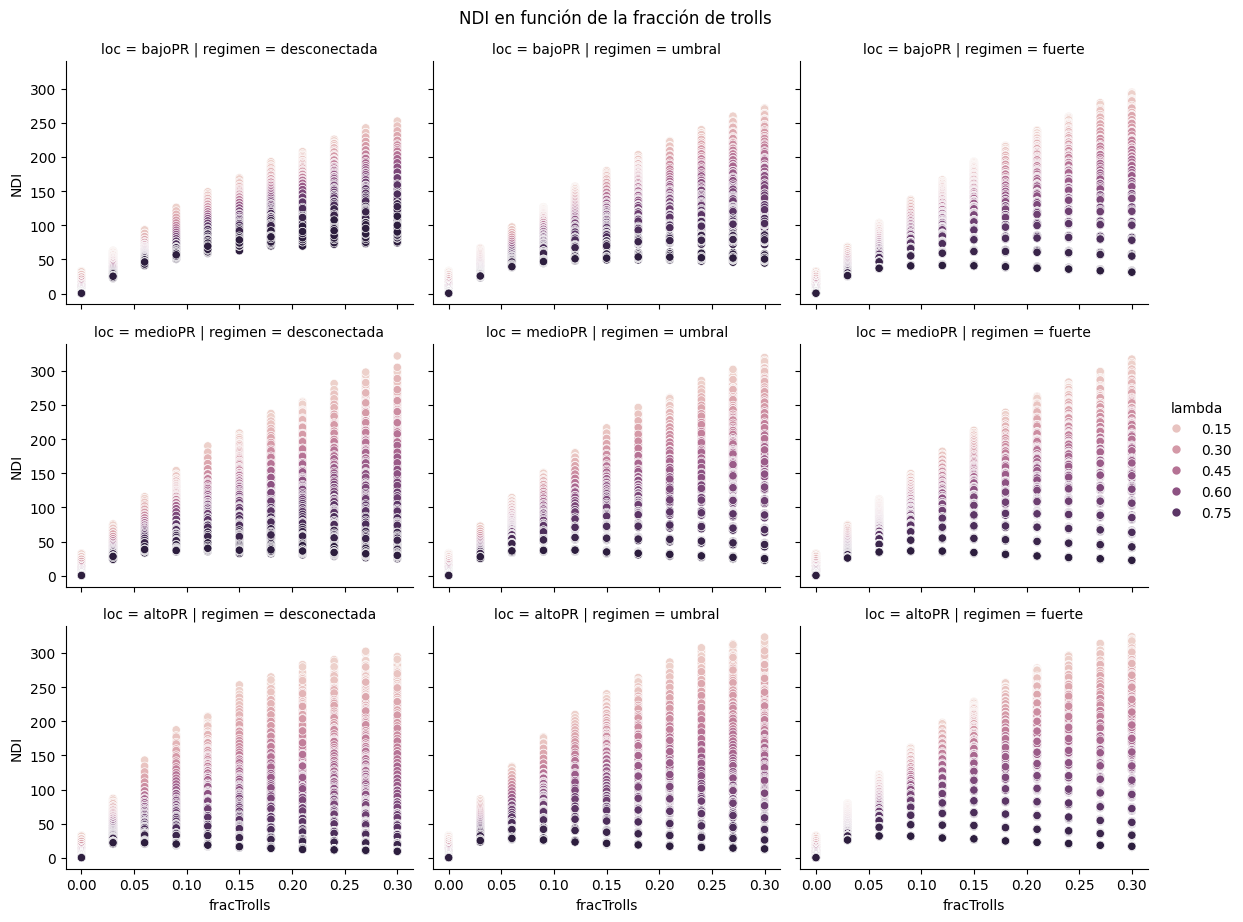

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.relplot(
    data=df,
    x="fracTrolls",
    y="NDI",
    col="regimen",
    row="loc",
    hue="lambda",
    kind="scatter",
    height=3,
    aspect=1.3
)
plt.suptitle("NDI en función de la fracción de trolls", y=1.02)
plt.show()


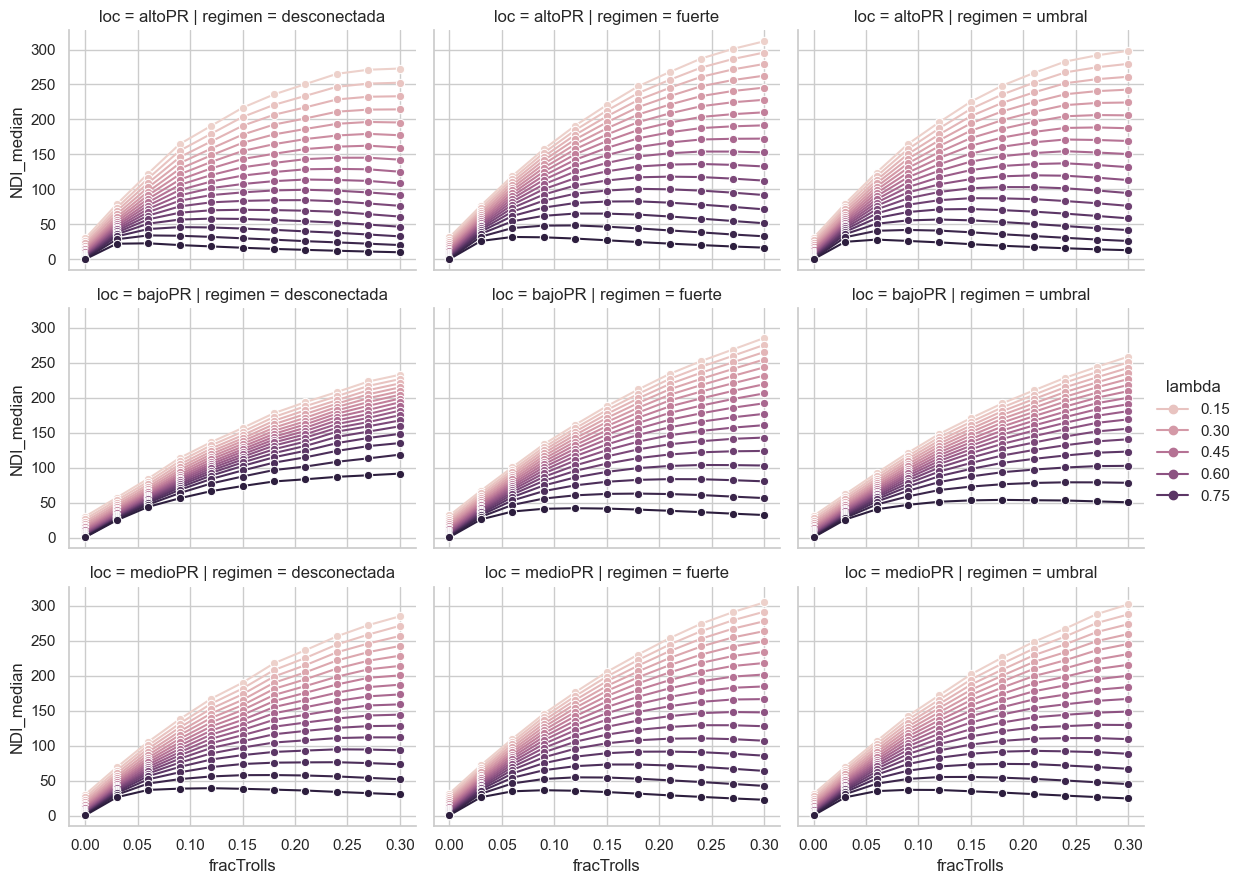

In [28]:
df_agg = df.groupby(
    ["fracTrolls", "lambda", "regimen", "loc"]
).agg(
    NDI_median=("NDI", "median"),
    NDI_std=("NDI", "std")
).reset_index()
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.relplot(
    data=df_agg,
    x="fracTrolls",
    y="NDI_median",
    col="regimen",
    row="loc",
    hue="lambda",
    kind="line",
    marker="o",
    height=3,
    aspect=1.3   
)




In [25]:
df_agg

,regimen,loc,lambda,fracTrolls,NDI_median,NDI_std
0,desconectada,altoPR,0.1,0.00,29.977728,1.161112
1,desconectada,altoPR,0.1,0.03,78.701441,4.182562
2,desconectada,altoPR,0.1,0.06,122.709963,6.431683
3,desconectada,altoPR,0.1,0.09,164.780264,9.459089
4,desconectada,altoPR,0.1,0.12,190.834944,9.826664
...,...,...,...,...,...,...
1678,umbral,medioPR,0.9,0.18,32.885305,0.928314
1679,umbral,medioPR,0.9,0.21,30.685013,0.934589
1680,umbral,medioPR,0.9,0.24,28.557301,0.862913
1681,umbral,medioPR,0.9,0.27,26.475965,0.859699


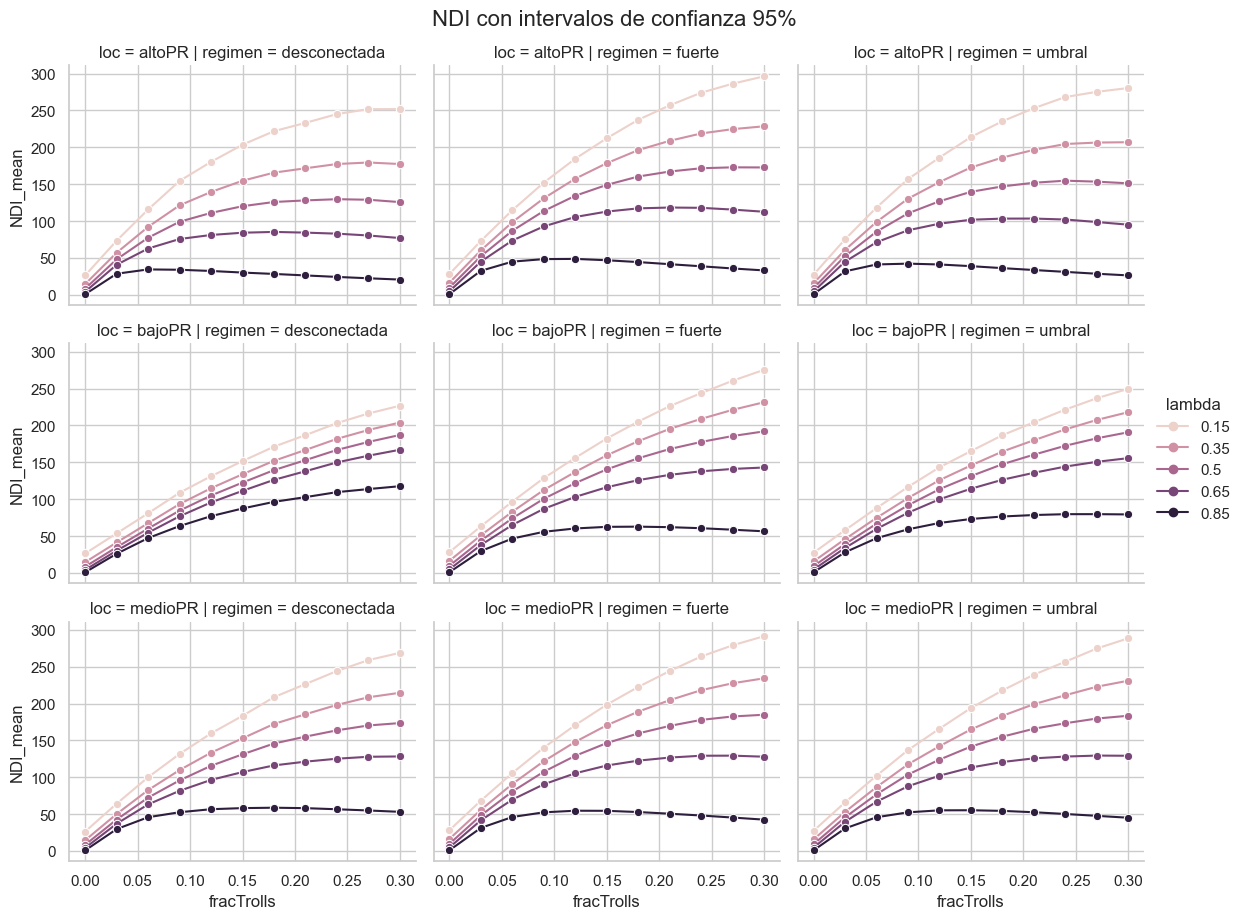

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================
# 1) AGREGAR: MEDIA, STD E INTERVALO 95%
# ============================================

df_agg = (
    df.groupby(["regimen", "loc", "lambda", "fracTrolls"])
      .agg(
          NDI_mean=("NDI", "mean"),
          NDI_std=("NDI", "std"),
          NDI_n=("NDI", "count")
      )
      .reset_index()
)

# error estándar
df_agg["NDI_se"] = df_agg["NDI_std"] / np.sqrt(df_agg["NDI_n"])

# intervalo de confianza 95%
df_agg["NDI_ci_low"] = df_agg["NDI_mean"] - 1.96 * df_agg["NDI_se"]
df_agg["NDI_ci_high"] = df_agg["NDI_mean"] + 1.96 * df_agg["NDI_se"]

# ============================================
# 2) SELECCIONAR λ REPRESENTATIVOS
# ============================================

keep_lams = df_agg["lambda"].quantile([0.10, 0.30, 0.50, 0.70, 0.90]).unique()
df_small = df_agg[df_agg["lambda"].isin(keep_lams)]

# ============================================
# 3) CREAR FIGURA BASE
# ============================================

g = sns.relplot(
    data=df_small,
    x="fracTrolls",
    y="NDI_mean",
    col="regimen",
    row="loc",
    hue="lambda",
    kind="line",
    marker="o",
    height=3,
    aspect=1.3
)

# ============================================
# 4) AÑADIR INTERVALO DE CONFIANZA A MANO
# ============================================

for (reg, loc), ax in g.axes_dict.items():
    temp = df_small[(df_small["regimen"] == reg) & (df_small["loc"] == loc)]
    for lam in temp["lambda"].unique():

        tmp2 = temp[temp["lambda"] == lam].sort_values("fracTrolls")

        ax.fill_between(
            tmp2["fracTrolls"],
            tmp2["NDI_ci_low"],
            tmp2["NDI_ci_high"],
            alpha=0.2
        )

plt.suptitle("NDI con intervalos de confianza 95%", y=1.02, fontsize=16)
plt.show()
